In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [81]:
covid_data_kaggle_df = pd.read_csv('../Data/covid_data_kaggle.csv')
owid_data_df = pd.read_csv('../Data/owid-covid-data.csv')
covid_data_kaggle_df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [82]:
covid_data_kaggle_df.rename(columns = {
    'PATIENT_TYPE':'Type of Care', 
    'CLASIFFICATION_FINAL':'Covid Test Findings', 
    'INMSUPR':'Immuno-supression',
    'ICU': 'Intensive Care Unit Transfer'}, 
    inplace = True)

# Remove two columns name is 'MEDICAL_UNIT' and 'USMER' since we dont have sufficient information
covid_data_kaggle_df.drop(['MEDICAL_UNIT', 'USMER'], axis=1, inplace=True)
covid_data_kaggle_df.head(10)


,SEX,Type of Care,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,Immuno-supression,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,Covid Test Findings,Intensive Care Unit Transfer
0,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
5,1,2,9999-99-99,2,1,40,2,2,2,2,2,2,2,2,2,2,2,3,2
6,1,1,9999-99-99,97,2,64,2,2,2,2,2,2,2,2,2,2,2,3,97
7,1,1,9999-99-99,97,1,64,2,1,2,2,1,1,2,2,2,1,2,3,97
8,1,2,9999-99-99,2,2,37,2,1,2,2,2,1,2,2,1,2,2,3,2
9,1,2,9999-99-99,2,2,25,2,2,2,2,2,2,2,2,2,2,2,3,2


In [83]:
# Convert column titles to lowercase with first letter capitalized
covid_data_kaggle_df.columns = [col.lower().capitalize() for col in covid_data_kaggle_df.columns]
covid_data_kaggle_df['Sex'] = covid_data_kaggle_df['Sex'].replace(1,'Female')
covid_data_kaggle_df['Sex'] = covid_data_kaggle_df['Sex'].replace(2,'Male')

covid_data_kaggle_df['Type of care'] = covid_data_kaggle_df['Type of care'].replace(1,'Returned Home')
covid_data_kaggle_df['Type of care'] = covid_data_kaggle_df['Type of care'].replace(2,'Hospitalization')
covid_data_kaggle_df['Date_died'] = covid_data_kaggle_df['Date_died'].replace('9999-99-99','-')

In [84]:
exclude_columns = ['Age', 'Covid test findings']
for col in covid_data_kaggle_df.columns:
    if col not in exclude_columns:
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(1, 'Yes')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(2, 'No')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(97, '-')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(98, '-')
        covid_data_kaggle_df[col] = covid_data_kaggle_df[col].replace(99, '-')



In [85]:
# Checking for Nan for each column
covid_data_kaggle_df.isna().sum()

Sex                             0
Type of care                    0
Date_died                       0
Intubed                         0
Pneumonia                       0
Age                             0
Pregnant                        0
Diabetes                        0
Copd                            0
Asthma                          0
Immuno-supression               0
Hipertension                    0
Other_disease                   0
Cardiovascular                  0
Obesity                         0
Renal_chronic                   0
Tobacco                         0
Covid test findings             0
Intensive care unit transfer    0
dtype: int64

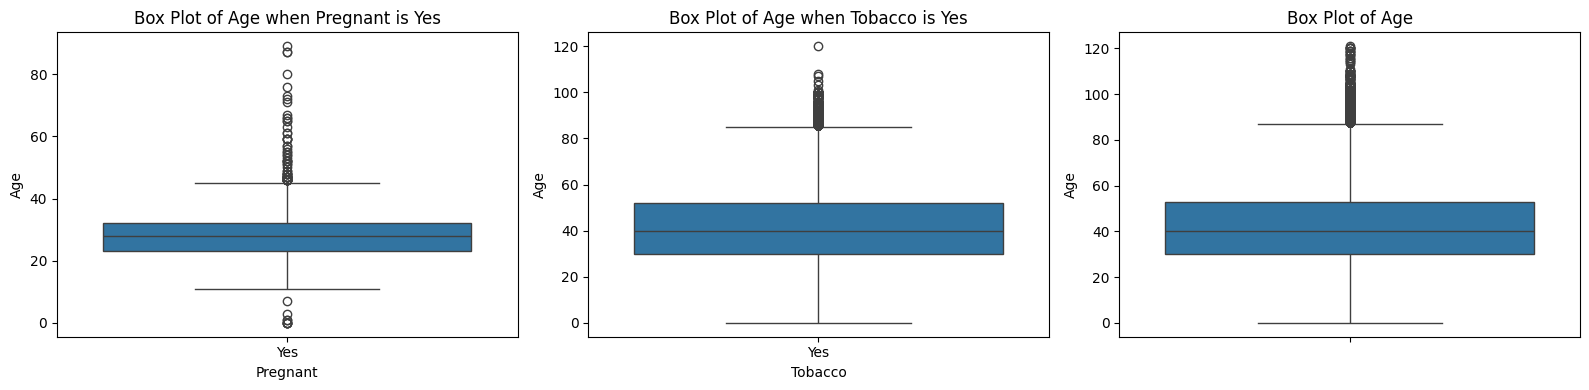

In [86]:
# Detecting outliers first based on age and pregrancy
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 4))

# Subplot for 'Pregnant' == 'Yes'
sns.boxplot(x='Pregnant', y='Age', data=covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes'], ax=axes[0])
axes[0].set_title('Box Plot of Age when Pregnant is Yes')

# Subplot for 'Pregnant' == 'No'
sns.boxplot(x='Tobacco', y='Age', data=covid_data_kaggle_df[covid_data_kaggle_df['Tobacco'] == 'Yes'], ax=axes[1])
axes[1].set_title('Box Plot of Age when Tobacco is Yes')

# Subplot for Age
sns.boxplot(y='Age', data=covid_data_kaggle_df, ax=axes[2])
axes[2].set_title('Box Plot of Age')

# Adjust layout
plt.tight_layout()
plt.show()

In [87]:
# Remove outliers using IQR method
Q1 = covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes']['Age'].quantile(0.25)
Q3 = covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes']['Age'].quantile(0.75)
IQR = Q3 - Q1

covid_data_kaggle_df = covid_data_kaggle_df[~((covid_data_kaggle_df['Pregnant'] == 'Yes') & ((covid_data_kaggle_df['Age'] <= (Q1 - 1.5 * IQR)) | (covid_data_kaggle_df['Age'] > (Q3 + 1.5 * IQR))))]
covid_data_kaggle_df[covid_data_kaggle_df['Pregnant'] == 'Yes']['Age'].unique()

array([23, 30, 33, 25, 26, 34, 22, 24, 27, 31, 28, 29, 20, 38, 21, 44, 35,
       42, 39, 18, 40, 19, 43, 32, 37, 45, 36, 41, 15, 16, 17, 14, 12, 13,
       11], dtype=int64)

In [88]:
# Remove outliers using IQR method
covid_data_kaggle_df = covid_data_kaggle_df[~((covid_data_kaggle_df['Tobacco'] == 'Yes') & ((covid_data_kaggle_df['Age'] <= 10)))]

In [89]:
# Define the age bins and labels
age_bins = [0, 18, 34, 49, int(covid_data_kaggle_df['Age'].max())]  # Bins represent the upper age limit for each group
age_labels = ['0-18', '19-34', '35-49', '50+']
# Create the "Age Group" column using pd.cut
covid_data_kaggle_df['Age Group'] = pd.cut(covid_data_kaggle_df['Age'], bins=age_bins, labels=age_labels, right=False)
covid_data_kaggle_df['Age Group'].value_counts()


Age Group
35-49    349535
50+      342375
19-34    302200
0-18      54246
Name: count, dtype: int64

In [90]:
covid_test_bins = [1, 3, 7]  # Bins represent the upper age limit for each group
test_labels = ['Positive', 'Negative']
# Create the "Test Outcome" column 
covid_data_kaggle_df['Test Outcome'] = pd.cut(covid_data_kaggle_df['Covid test findings'], bins=covid_test_bins, labels=test_labels, right=True)
covid_data_kaggle_df.drop(['Covid test findings'], axis=1, inplace=True)

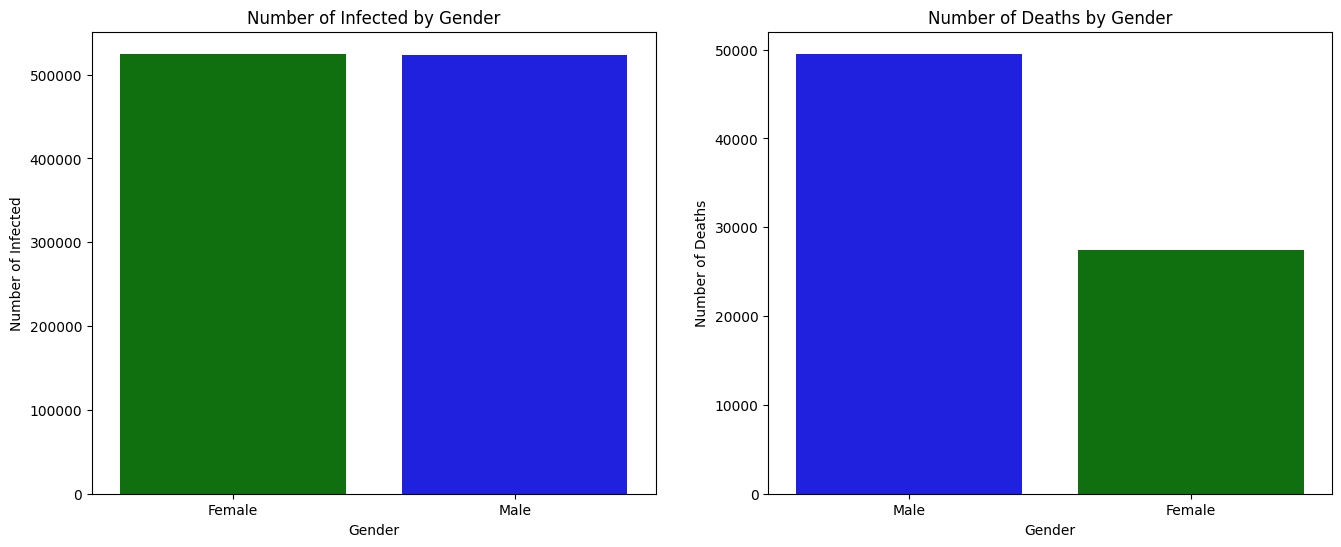

In [91]:
# Filter the DataFrame for rows where "Date_died" is not '-'
deaths_df = covid_data_kaggle_df[covid_data_kaggle_df['Date_died'] != '-']
death_counts = deaths_df['Sex'].value_counts()
infection_counts = covid_data_kaggle_df['Sex'].value_counts()
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for females and males
colors = {'Female': 'green', 'Male': 'blue'}

# Plot for number of infected males and females
sns.barplot(x=infection_counts.index, y=infection_counts.values, hue=infection_counts.index, palette=colors, ax=ax1)
ax1.set_title('Number of Infected by Gender')
ax1.set_xlabel('Gender')
ax1.set_ylabel('Number of Infected')

# Plot for number of deaths by gender
sns.barplot(x=death_counts.index, y=death_counts.values, hue=death_counts.index, palette=colors, ax=ax2)
ax2.set_title('Number of Deaths by Gender')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Deaths')

plt.show()

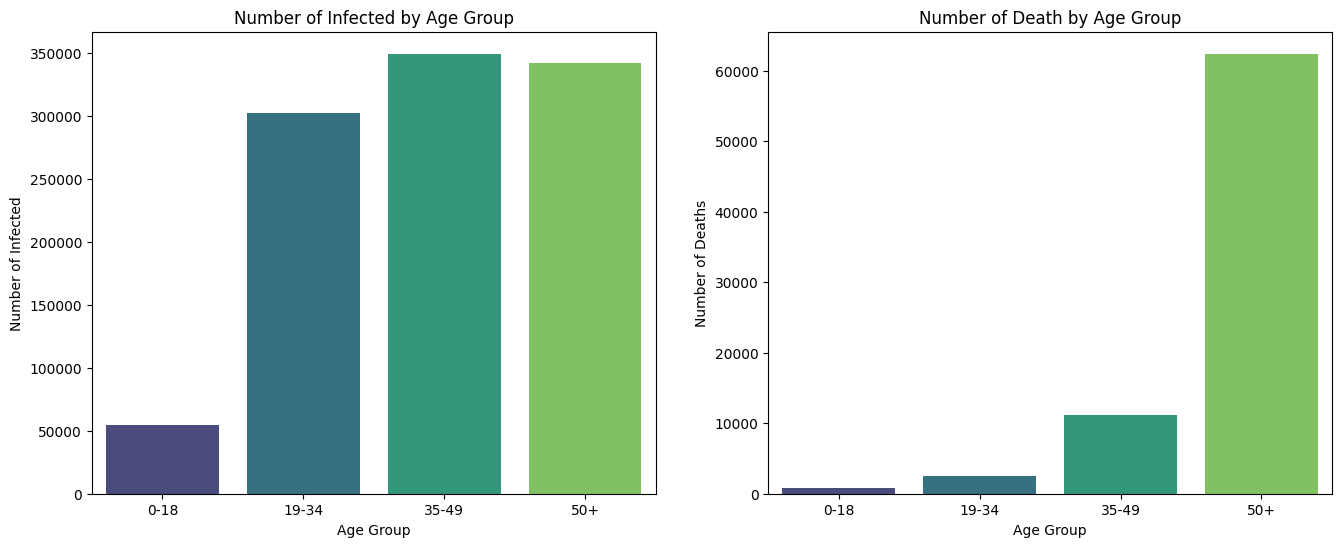

In [92]:
infection_counts_by_age_group = covid_data_kaggle_df['Age Group'].value_counts()
# Count the number of deaths per age group
death_counts_age_group = deaths_df['Age Group'].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot for number of infected males and females
sns.barplot(x=infection_counts_by_age_group.index, y=infection_counts_by_age_group.values, hue=infection_counts_by_age_group.index, palette='viridis', ax=ax1)
ax1.set_title('Number of Infected by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Number of Infected')

# Plot for number of survivals by gender
sns.barplot(x=death_counts_age_group.index, y=death_counts_age_group.values, hue=death_counts_age_group.index, palette='viridis', ax=ax2)
ax2.set_title('Number of Death by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Number of Deaths')

plt.show()

Tobacco
No     69620
Yes     6592
-        725
Name: count, dtype: int64
7.8265618692565235
7.245207932888686


<Figure size 1000x600 with 0 Axes>

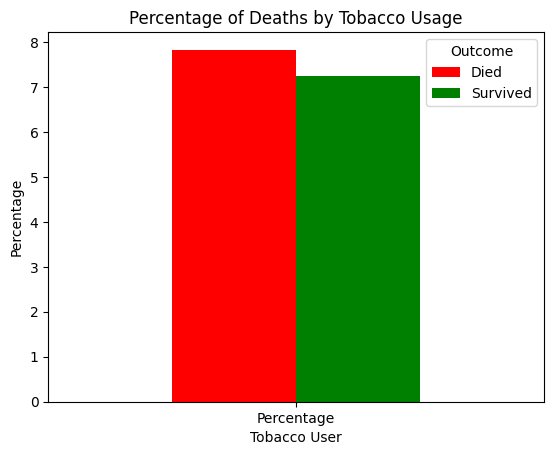

In [93]:
infection_counts_by_tobacco = covid_data_kaggle_df['Tobacco'].value_counts()
# Count the number of deaths among Tobacco users and non-Tobacco users
deaths_counts = deaths_df['Tobacco'].value_counts()
print(deaths_counts)
# Calculate the percentage of deaths among Tobacco users and non-Tobacco users
percentage_deaths_tobacco = (deaths_counts['Yes'] / infection_counts_by_tobacco['Yes']) * 100
percentage_survival_tobacco = (deaths_counts['No']/ infection_counts_by_tobacco['No']) * 100
print(percentage_deaths_tobacco)
print(percentage_survival_tobacco)

# Create a DataFrame for plotting with a proper index
plot_data = pd.DataFrame({
    'Tobacco User': percentage_deaths_tobacco,
    'Non-Tobacco User': percentage_survival_tobacco
}, index=['Percentage'])

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
plot_data.plot(kind='bar', color=['red', 'green'])
plt.title('Percentage of Deaths by Tobacco Usage')
plt.xlabel('Tobacco User')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Outcome', labels=['Died', 'Survived'])
plt.show()

In [94]:
covid_data_kaggle_df['Passed_away'] = covid_data_kaggle_df.Date_died.apply(lambda x: 'No' if x=='-' else 'Yes')
covid_data_kaggle_df.columns


Index(['Sex', 'Type of care', 'Date_died', 'Intubed', 'Pneumonia', 'Age',
       'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Immuno-supression',
       'Hipertension', 'Other_disease', 'Cardiovascular', 'Obesity',
       'Renal_chronic', 'Tobacco', 'Intensive care unit transfer', 'Age Group',
       'Test Outcome', 'Passed_away'],
      dtype='object')

C:\Users\arammos\AppData\Local\Temp\ipykernel_15852\643913074.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Percentage', y='Column', data=plot_data, palette='viridis')


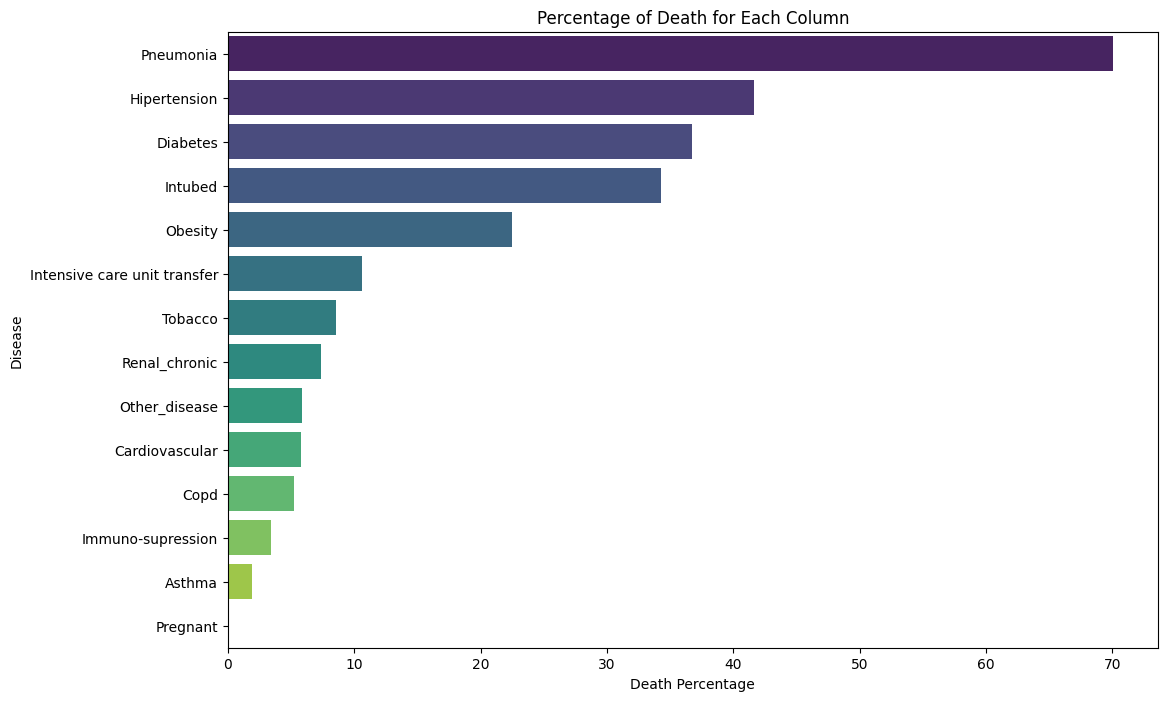

In [106]:
#Calculation of death percentage to detect the effect of each on incidence of death
total_deaths = covid_data_kaggle_df[covid_data_kaggle_df['Passed_away']=='Yes'].Passed_away.count()

percentage = []
columns=['Intubed', 'Pneumonia', 'Pregnant', 'Hipertension', 'Obesity', 'Cardiovascular', 'Renal_chronic', 'Tobacco', 'Other_disease', 'Copd', 'Diabetes', 'Asthma', 'Intensive care unit transfer', 'Immuno-supression']
for column in columns:
    percentage_per_column = covid_data_kaggle_df[(covid_data_kaggle_df['Passed_away']=='Yes') & (covid_data_kaggle_df[column]=='Yes')].Passed_away.count()/total_deaths * 100
    percentage.append(percentage_per_column)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'Column': columns, 'Percentage': percentage})

# Sort the DataFrame by Percentage in descending order
plot_data = plot_data.sort_values(by='Percentage', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Percentage', y='Column', data=plot_data, palette='viridis')
plt.title('Percentage of Death for Each Condition')
plt.xlabel('Death Percentage')
plt.ylabel('Condition')
plt.show()